<a href="https://colab.research.google.com/github/Jana-ekram/AI-Project/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Yara Shoukri

ID: 55-2433

Tutorial: T-4

---

Name: Jana Ekram

ID:  55-2243

Tutorial: T-4

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [2]:
df.info()

columns_to_check = [
    'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'
]

missing_info = pd.DataFrame({
    'Missing Values Count': df[columns_to_check].isnull().sum(),
})

print(missing_info)

columns_to_check = [
    'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'
]

for column in columns_to_check:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print(f"Number of unique values: {df[column].nunique()}\n")

# Display the basic information of the DataFrame (e.g., number of rows, columns, data types)
# Calculate missing values for the specified columns
# Display the count of missing values for the selected columns
# List of columns to check for unique values
# Display the unique values and number of unique values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

## Data Cleaning

In [3]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '', regex=False).astype(float)
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').str.replace('/m', '').astype(float)

def impute_missing(row):
    if pd.isnull(row['TotalCharges']):
        return row['MonthlyCharges'] * row['tenure']
    return row['TotalCharges']

df['TotalCharges'] = df.apply(impute_missing, axis=1)

df.head()

initial_row_count = len(df)

df = df.dropna(subset=['customerID'])

remaining_row_count = len(df)

removed_rows = initial_row_count - remaining_row_count

print(f'Number of removed rows: {removed_rows}')
print(f'Number of rows after dropping: {remaining_row_count}')

# Remove dollar signs and convert 'TotalCharges' and 'MonthlyCharges' to numeric
# Impute missing 'TotalCharges' values by multiplying 'MonthlyCharges' and 'tenure'
# Count the initial number of rows in the dataset
# Drop rows with missing 'customerID' values
# Calculate and print the number of rows removed
# Print the number of rows remaining after dropping the rows with missing 'customerID'

Number of removed rows: 56
Number of rows after dropping: 6976


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

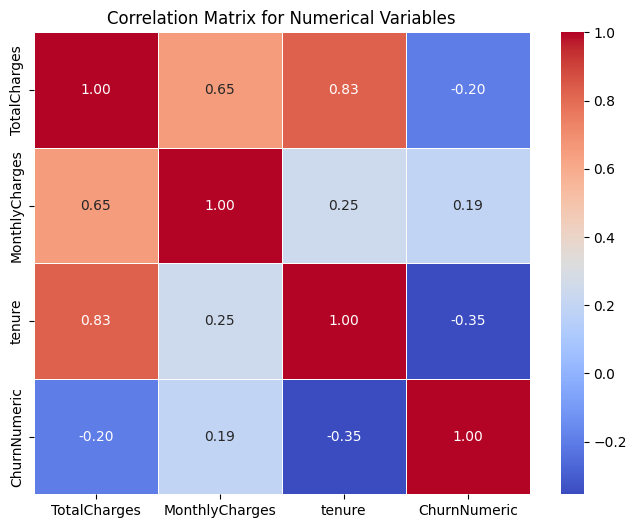

In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

def chi_squared_test(df, categorical_cols):
    chi_squared_results = {}

    for col in categorical_cols:
        if col != 'Churn':
            contingency_table = pd.crosstab(df[col], df['Churn'])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi_squared_results[col] = p

    return pd.Series(chi_squared_results).sort_values()

chi_results = chi_squared_test(df, categorical_cols)

df['ChurnNumeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

numerical_cols = ['TotalCharges', 'MonthlyCharges', 'tenure', 'ChurnNumeric']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

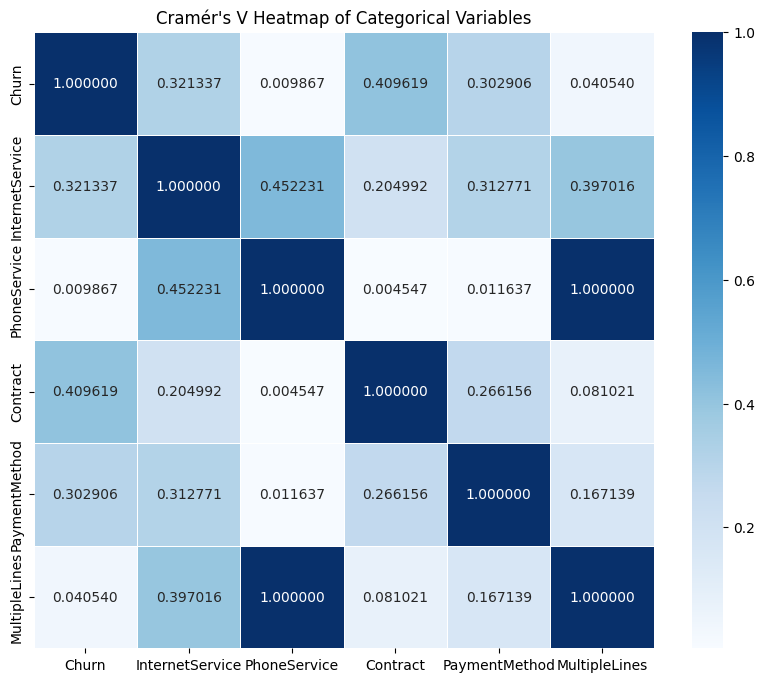

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

categorical_columns = ['Churn', 'InternetService', 'PhoneService', 'Contract', 'PaymentMethod', 'MultipleLines']

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="Blues", fmt=".6f", linewidths=0.5)
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.show()

# Perform Chi-Squared test for associations between categorical variables and 'Churn'
# Display p-values of the Chi-Squared test for each feature
# Convert 'Churn' from 'Yes'/'No' to 1/0 for further numerical analysis
# Calculate and plot the correlation matrix for numerical variables like 'TotalCharges', 'MonthlyCharges', etc.
# Create a Cramér's V heatmap to show the strength of relationships between pairs of categorical variables

**Answer for Q1**: Internet service with the highest positive correlation with 0.397 followed by the tenure with negative correlation -0.35

**Q2: Which payment method has the highest churn rate?**

**Visualization**

Churn Rate by Payment Method (% of churned customers):
PaymentMethod
Electronic check             57.250674
Mailed check                 16.549865
Bank transfer (automatic)    13.854447
Credit card (automatic)      12.345013
Name: proportion, dtype: float64


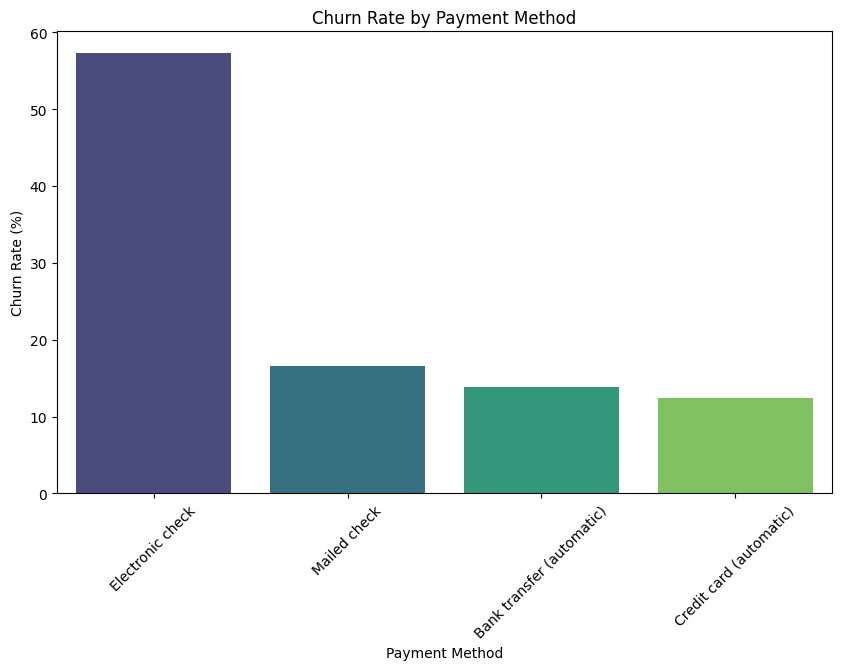

In [6]:
churned_customers = df[df['Churn'] == 'Yes']

churn_rate_by_payment = churned_customers['PaymentMethod'].value_counts(normalize=True) * 100

churn_rate_by_payment = churn_rate_by_payment.sort_values(ascending=False)


print("Churn Rate by Payment Method (% of churned customers):")
print(churn_rate_by_payment)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_payment.index, y=churn_rate_by_payment.values, hue=churn_rate_by_payment.index, palette="viridis", dodge=False)
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Filter data to only include churned customers (Churn = "Yes")
# Calculate churn rate for each payment method
# Sort the results to find the payment method with the highest churn rate
# Plot the churn rate by payment method for better visualization


**Answer for Q2**: Electronic check

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

Number of churned customers for each tenure value:
tenure
1     376
2     123
3      93
4      83
5      64
     ... 
68      9
69      8
70     11
71      6
72      6
Name: count, Length: 72, dtype: int64


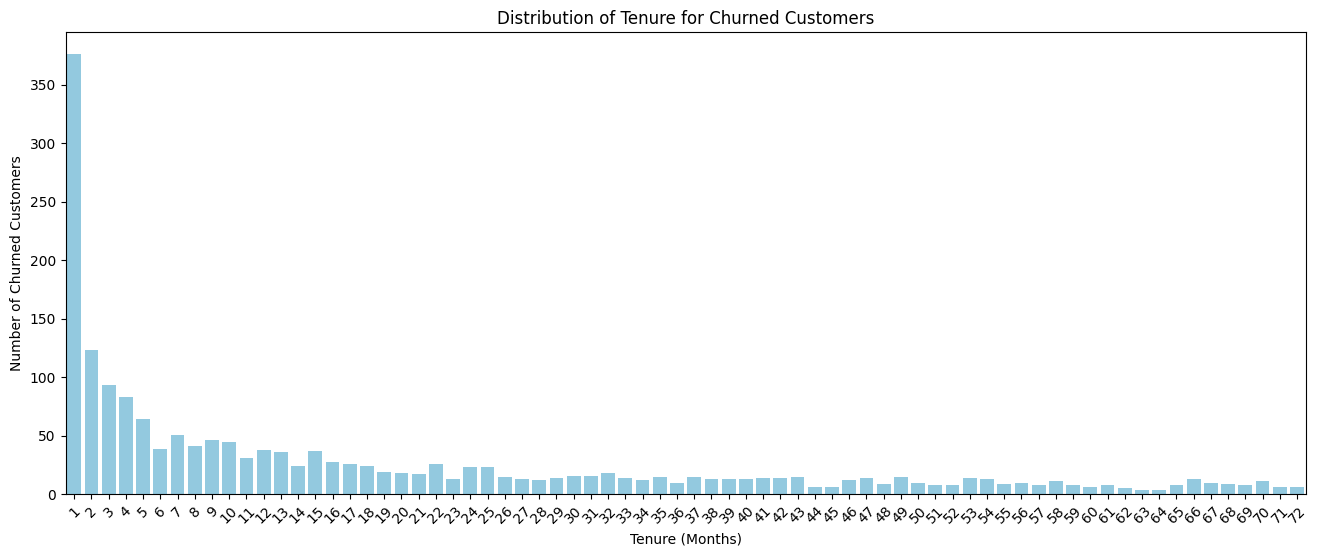

The most common tenure at which customers churn is: 1 months.


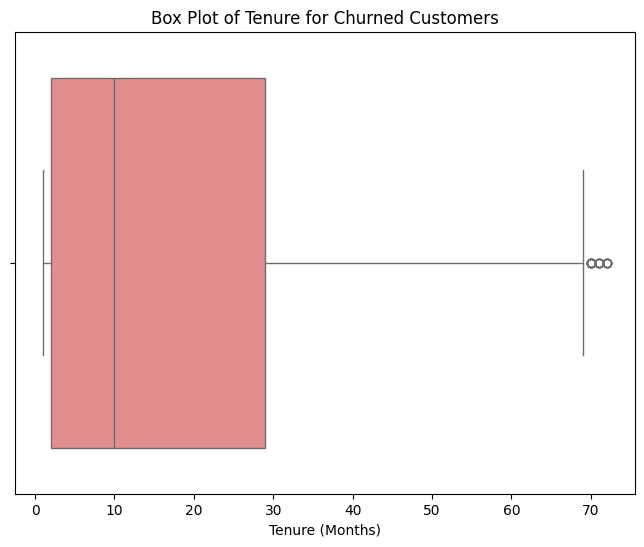

Tenure Quartiles for Churned Customers:
0.25     2.0
0.50    10.0
0.75    29.0
Name: tenure, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

churned_customers = df[df['Churn'] == "Yes"]

churn_by_tenure = churned_customers['tenure'].value_counts().sort_index()
print("Number of churned customers for each tenure value:")
print(churn_by_tenure)

plt.figure(figsize=(16, 6))
sns.barplot(x=churn_by_tenure.index, y=churn_by_tenure.values, color='skyblue')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.show()

most_common_tenure = churn_by_tenure.idxmax()
print(f"The most common tenure at which customers churn is: {most_common_tenure} months.")

plt.figure(figsize=(8, 6))
sns.boxplot(x=churned_customers['tenure'], color='lightcoral')
plt.title('Box Plot of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.show()

tenure_quartiles = churned_customers['tenure'].quantile([0.25, 0.5, 0.75])
print("Tenure Quartiles for Churned Customers:")
print(tenure_quartiles)

# Filter the dataset to include only churned customers to analyze their tenure.
# Group the churned customers by their tenure and count how many customers churned at each tenure value.
# Plot a bar chart to visualize the number of churned customers across different tenure values.
# Identify the tenure value with the highest churn rate.
# Create a box plot to visualize the distribution of tenure values for churned customers, including outliers.
# Calculate the 25th, 50th, and 75th percentiles (quartiles) of tenure for churned customers.


**Answer for Q3**: after 1 month "Highest churn"

after 2 months, 25% of churners which represents that most churners churn within the first 2 months , 50% churn after 10 months, 75% churn after 29 months

In [8]:
df.head()
[9]


[9]

In [9]:
#for finding the original values when writing the rule in the end

def denormalize(normalized_value, column_name):
    min_value = df[column_name].min()  # Get the minimum value of the column
    max_value = df[column_name].max()  # Get the maximum value of the column
    return (normalized_value * (max_value - min_value)) + min_value

column_name = 'tenure'
normalized_value = 0.01
original_value = denormalize(normalized_value, column_name)
print(f"The original value is: {original_value}")

print(df['tenure'].max())

The original value is: 1.71
72


## Data Preparation for Modelling

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

df.columns = df.columns.str.strip()

ordinal_features = ['Contract']

nominal_features = ['gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaymentMethod']  # Removed PhoneService and MultipleLines

contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)

for col in ordinal_features:
    df[col] = df[col].astype('category').cat.codes

df_encoded = pd.get_dummies(df, columns=nominal_features, drop_first=False)


df = df_encoded.drop(columns=['customerID', 'PhoneService',
                                      'TotalCharges', 'Churn', 'MultipleLines','PaperlessBilling','StreamingTV',
                                      'StreamingMovies'])

df = df.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == 'bool' else x)

df.head(50)

# Normalize continuous variables like Tenure and MonthlyCharges using MinMaxScaler.
# Remove extra whitespace from column names to avoid issues with column name matching.
# Define categorical features, separating them into ordinal (with a natural order) and nominal (without a natural order).
# Apply custom encoding to the Contract feature, which is ordinal, by mapping the contract types to numerical values.
# Apply label encoding to other ordinal features (if applicable) by converting them to category codes.
# Perform one-hot encoding for nominal features such as gender, Partner, InternetService, etc.
# Convert boolean columns to 1/0 encoding to make them suitable for machine learning models.

# For the columns we dropped, we dropped the customerID as it should be dropped and is irrelevant to the model. We droped TotalCharges as it can be derived from monthly charges and tenure.
# The rest of the columns we dropped were based on trial and error based on observing the accuracy before and after each change.



,SeniorCitizen,tenure,Contract,MonthlyCharges,ChurnNumeric,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0,0.115423,0,1,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0.464789,1,0.385075,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
2,0,0.014085,0,0.354229,1,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0.619718,1,0.239303,0,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,0
4,0,0.014085,0,0.521891,1,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
5,0,0.098592,0,0.809950,1,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
6,0,0.295775,0,0.704975,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
7,0,0.126761,0,0.114428,0,1,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
8,0,0.380282,0,0.861194,1,1,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
9,0,0.859155,1,0.377114,0,0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0


## Modelling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

X = df.drop(columns=['ChurnNumeric'])
y = df['ChurnNumeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Split the data into training and testing sets
# Drop target columns
# Churn target variable
# Split the data: 80% train, 20% test
# Initialize and train the Decision Tree model


DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [12]:
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['Churn', 'No Churn'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

# Create a graph from the dot data

# One Rule
Based on this segment of the tree rules:
If the contract type is "Month-to-month" and the customer does not have "Fiber optic" internet service, and and they do not have tech support, and their tenure is less than 1.71 months, and the customer is not a senior citizen, and they do not use a "Credit card (automatic)" payment method, and their monthly charges are less than 19.25, and their payment method is not an "Electronic check", then the customer is likely to churn.

## Evaluation

Train Result:
Accuracy Score: 99.57%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.994874     0.997977  0.995699     0.996426      0.995709
recall        0.999265     0.986009  0.995699     0.992637      0.995699
f1-score      0.997065     0.991957  0.995699     0.994511      0.995691
support    4079.000000  1501.000000  0.995699  5580.000000   5580.000000
_______________________________________________
Confusion Matrix: 
 [[4076    3]
 [  21 1480]]

Test Result:
Accuracy Score: 74.43%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.834800    0.495979  0.744269     0.665389      0.748881
recall        0.819578    0.522599  0.744269     0.671088      0.744269
f1-score      0.827119    0.508941  0.744269     0.668030      0.746435
support    1042.000000  354.000000  

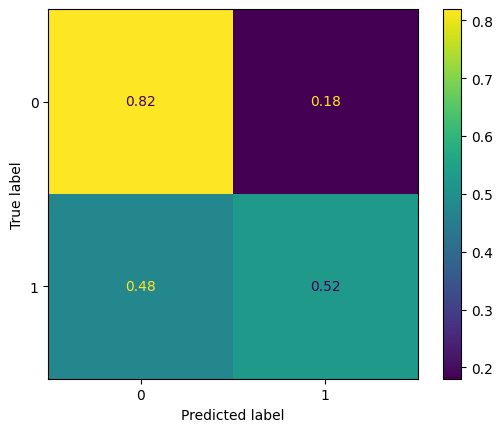

Precision:  0.4959785522788204
Recall:  0.5225988700564972
F1_score:  0.5089408528198074
|--- Contract <= 0.50
|   |--- InternetService_Fiber optic <= 0.50
|   |   |--- tenure <= 0.04
|   |   |   |--- TechSupport_No <= 0.50
|   |   |   |   |--- tenure <= 0.01
|   |   |   |   |   |--- SeniorCitizen <= 0.50
|   |   |   |   |   |   |--- PaymentMethod_Credit card (automatic) <= 0.50
|   |   |   |   |   |   |   |--- MonthlyCharges <= 0.01
|   |   |   |   |   |   |   |   |--- MonthlyCharges <= 0.01
|   |   |   |   |   |   |   |   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- PaymentMethod_Electronic check >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- MonthlyCharges >  0.01
|   |   |   |   |   |   |   |   |   |--- gender_Female <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- gender_Female > 

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

        cm = confusion_matrix(y_test, pred, labels=clf.classes_, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot()
        plt.grid(False)
        plt.show()

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

pred = tree_clf.predict(X_test)

print('Precision: ', precision_score(y_test, pred))
print('=======================================')
print('Recall: ', recall_score(y_test, pred))
print('=======================================')
print('F1_score: ', f1_score(y_test, pred))

# Print accuracy, confusion matrix, and classification report
# Display confusion matrix as a plot
# Evaluate on training data
# Evaluate on test data

from sklearn.tree import export_text

tree_rules = export_text(tree_clf, feature_names=X.columns.tolist())
print(tree_rules)

# Generate textual representation of the decision tree

# Comment on Evaluation

**Training Result**

Accuracy Score: 99.57%


The model performs extremely well on the training data, achieving near-perfect accuracy. However, this could indicate overfitting. However, we performed cross validation to confirm the accuracy.

</br>
Precision:

Class 0 (No Churn) Precision --> 0.9948: Most of the predicted 0s are correct, indicating very few false positives for class 0.

Class 1 (Churn) Precision --> 0.9979:
Similarly, predictions for 1 are highly reliable.

High precision in both classes indicates that when the model predicts a class, it's usually correct.

</br>
Recall:

Class 0 Recall (0.9993): Almost all true 0s were correctly identified.
Class 1 Recall (0.9860): Slightly lower than class 0, indicating that a small number of 1s were missed.

High recall means the model captures nearly all instances of each class.

</br>
F1-Score:

F1-score provides a single number that balances precision and recall.
The high F1-scores for both classes (class 0: 0.9971, class 1: 0.9919) confirm strong performance across the board.

</br>
Support:

Class 0: 4079

Class 1: 1501

The imbalance in support (more instances of 0 than 1) might make the model biased toward class 0.

</br>
Confusion Matrix

Row for class 0: True Negatives (4076), False Positives (3)

Row for class 1: False Negatives (21), True Positives (1480)

Very few errors for both false positives and false negatives.
Indicates the model performs well on the training data but might not generalize well to unseen data.



</br>

**Test Result**

Accuracy Score: 74.43%

The model achieves a moderate level of accuracy on the test data, with a significant drop from the training accuracy. This indicates that the model is overfitted to the training data and struggles to generalize to unseen data.

</br>
Precision:

Class 0 (No Churn) Precision --> 0.8348: Most of the predicted 0s are correct, indicating that the model is effective in minimizing false positives for class 0.

Class 1 (Churn) Precision --> 0.4960: Less than half of the predicted 1s are correct, highlighting a high number of false positives for class 1.

The precision imbalance shows the model is better at predicting class 0 than class 1.

</br>
Recall:

Class 0 Recall (0.8196): The model captures about 81.96% of true 0s, slightly lower than its precision for class 0.

Class 1 Recall (0.5226): The model identifies about 52.26% of true 1s, missing nearly half of the actual instances of class 1.

The recall imbalance suggests the model struggles to identify all instances of class 1.


</br>
F1-Score:

F1-score provides a single number that balances precision and recall. The F1-scores for class 0 (0.8271) confirm better performance compared to class 1 (0.5089), reflecting the model's difficulty in handling the minority class.


</br>
Support:

Class 0: 1042

Class 1: 354

The imbalance in support (more instances of 0 than 1) could contribute to the model's bias toward class 0.


</br>
Confusion Matrix:

Row for class 0: True Negatives (854), False Positives (188)

Row for class 1: False Negatives (169), True Positives (185)

The confusion matrix shows that the model performs reasonably well for class 0, with fewer false positives. However, for class 1, both false negatives and false positives are significant, highlighting poor performance on the minority class.

# Cross Validation (Extra)

In [14]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
# from sklearn.metrics import f1_score, recall_score
# import numpy as np

# clf = DecisionTreeClassifier(random_state=42)

# skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')

# print(f"F1-Score for each fold: {scores}")
# print(f"Average F1-Score: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


# params = {
#     "criterion": ["gini", "entropy"],
#     "splitter": ["best", "random"],
#     "max_depth": list(range(1, 21)),
#     "min_samples_split": [2, 3, 4,5,6],
#     "min_samples_leaf": [1, 2, 3, 4, 5],
# }


# tree_cv = GridSearchCV(estimator=clf, param_grid=params, scoring='recall', n_jobs=-1, cv=3, verbose=1)

# tree_cv.fit(X_train, y_train)

# best_params = tree_cv.best_params_
# print(f"Best hyperparameters: {best_params}")

# tree_clf = DecisionTreeClassifier(**best_params)
# tree_clf.fit(X_train, y_train)

# print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

## Bonus (Optional)

In [15]:
from sklearn.linear_model import LogisticRegression
X = df.drop(columns=['ChurnNumeric'])
y = df['ChurnNumeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logregress = LogisticRegression(max_iter=2000)
logregress.fit(X_train, y_train)
y_pred = logregress.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

#the percentage of correct predictions is 79.93%
#True Negatives=1393, False Positives=147, False Negatives=273, True Positives=280


Accuracy: 79.93%
Confusion Matrix:
[[1393  147]
 [ 273  280]]
Precision: 0.66
Recall: 0.51
F1-Score: 0.57


# Comparison between Decision Tree and Logistic Regression

When comparing the Decision Tree and Logistic Regression models based on their F1-scores, the Logistic Regression model performs better with an F1-score of **0.57**, compared to the Decision Tree's F1-score of **0.51**. The F1-score is a balanced measure that considers both precision and recall, making it particularly useful when the class distribution is imbalanced, as is the case with churn prediction. The Logistic Regression model has slightly higher precision and recall, the Decision Tree model has a lower F1-score, indicating it struggles more with balancing false positives and false negatives. Therefore, based on the F1-score, **Logistic Regression** is the better-performing model for this task.
"""